<a href="https://colab.research.google.com/github/nikhil-lgtm/data-analysis-project/blob/main/diabetes_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

###Importing the dataset


In [ ]:
df=pd.read_csv('diabetes_uncleaned.csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
df.shape

(1000, 14)

In [ ]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [ ]:
df.rename(columns={'No_Pation':'Patients'},inplace=True)

In [ ]:
df.columns

Index(['ID', 'Patients', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1000 non-null   int64  
 1   Patients  1000 non-null   int64  
 2   Gender    1000 non-null   object 
 3   AGE       1000 non-null   int64  
 4   Urea      1000 non-null   float64
 5   Cr        1000 non-null   int64  
 6   HbA1c     1000 non-null   float64
 7   Chol      1000 non-null   float64
 8   TG        1000 non-null   float64
 9   HDL       1000 non-null   float64
 10  LDL       1000 non-null   float64
 11  VLDL      1000 non-null   float64
 12  BMI       1000 non-null   float64
 13  CLASS     1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [ ]:
df['CLASS'].value_counts()

,count
CLASS,
Y,840
N,102
P,53
Y,4
N,1


In [ ]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [ ]:
df['CLASS']=df['CLASS'].replace(['Y ','N '],['Y','N'] )

In [ ]:
df.CLASS.unique()

array(['N', 'P', 'Y'], dtype=object)

In [ ]:
df.isnull().sum()

,0
ID,0
Patients,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


<Axes: >

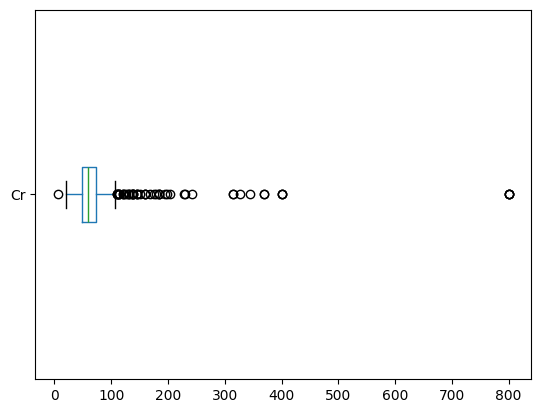

In [ ]:
df.boxplot('Cr',vert=False,grid=False)

###removing outliers using z-score

In [ ]:
from scipy import stats
df.dropna(subset='Cr',inplace=True)
z_score=stats.zscore(df['Cr'])
pd.DataFrame({'CR':df['Cr'],'Z_score':z_score}).head()

,CR,Z_score
0,46,-0.382672
1,62,-0.115804
2,46,-0.382672
3,46,-0.382672
4,46,-0.382672


In [ ]:
df = df[abs(z_score)<=2]

In [ ]:
df.shape

(981, 14)

<Axes: >

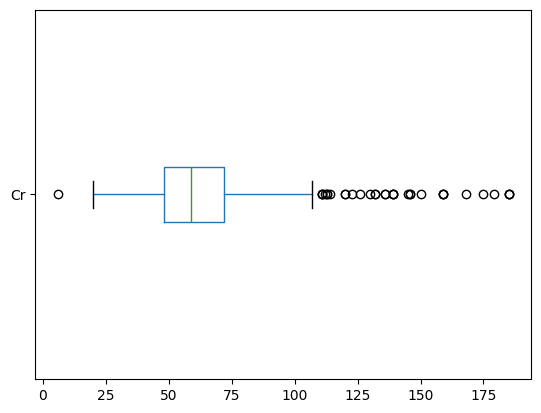

In [ ]:
df.boxplot('Cr',vert=False,grid=False)

<Axes: >

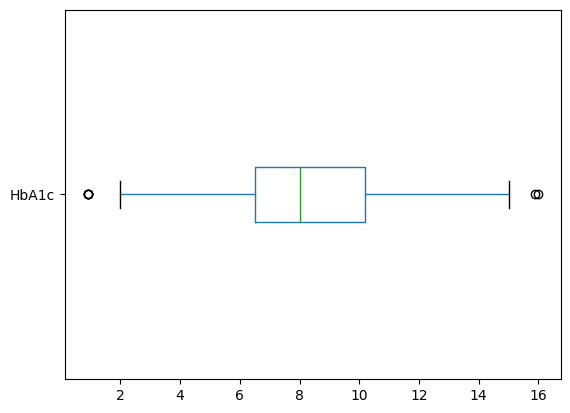

In [ ]:
df.boxplot('HbA1c' ,vert=False,grid=False)

In [ ]:
mean_hb=df['HbA1c'].mean()
df['HbA1c']=df['HbA1c'].fillna(mean_hb)

/tmp/ipython-input-66367362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HbA1c']=df['HbA1c'].fillna(mean_hb)


<Axes: >

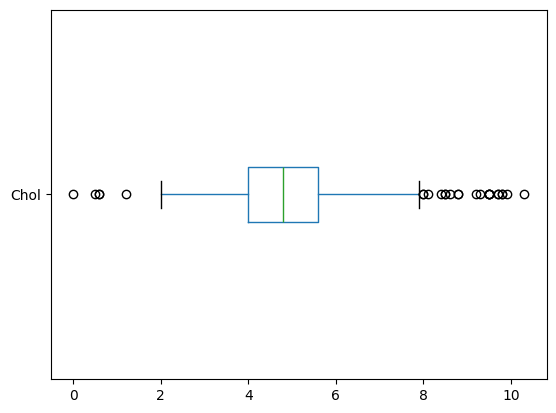

In [ ]:
df.boxplot('Chol' ,vert=False,grid=False)

In [ ]:
median_ch=df['Chol'].median()
df['Chol']=df['Chol'].fillna(median_ch)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
ID,0
Patients,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


In [ ]:
df[df.duplicated()]

,ID,Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS


In [ ]:
df.to_csv('diabetes_cleaned.csv')